In [6]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('mtn.csv')

In [9]:
df

,Unnamed: 0,Time,Date,Latitude,Longitude,Call Established/Calldrop,Timing Advance,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,107,27:41.0,2/18/2022,7.302863,5.149358,Call Established,NaN,-79.699997,-15.7,-63.900002
1,132,28:26.5,2/18/2022,7.301352,5.151550,Dropped Call,NaN,NaN,NaN,NaN
2,214,32:25.0,2/18/2022,7.287465,5.165219,Call Established,NaN,-69.199997,-8.7,-60.799999
3,237,33:07.0,2/18/2022,7.286134,5.168570,Dropped Call,2.0,-68.000000,3.3,NaN
4,458,39:41.0,2/18/2022,7.281025,5.191569,Call Established,NaN,-73.099998,-10.7,-60.400002
...,...,...,...,...,...,...,...,...,...,...
165,17831,26:53.0,2/24/2022,7.267527,5.161787,Call Established,NaN,-68.599998,3.0,NaN
166,17981,31:35.0,2/24/2022,7.275255,5.152578,Call Established,NaN,-69.400002,3.2,NaN
167,18110,35:35.0,2/24/2022,7.286213,5.153009,Call Established,NaN,-66.900002,3.9,NaN
168,18237,39:33.0,2/24/2022,7.296255,5.149453,Call Established,NaN,-63.900002,3.5,NaN


In [10]:
df.describe()

,Unnamed: 0,Latitude,Longitude,Timing Advance,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
count,170.000000,170.000000,170.000000,18.000000,164.000000,163.000000,88.000000
mean,9062.352941,7.279708,5.184207,1.138889,-73.208536,-5.233742,-62.926136
std,5152.015229,0.021872,0.046495,0.782258,9.578801,8.143878,8.673801
min,107.000000,7.235494,5.102670,0.000000,-99.800003,-21.600000,-83.699997
25%,4803.250000,7.263116,5.149582,0.625000,-79.475000,-12.250000,-67.525002
50%,9182.000000,7.279680,5.168292,1.000000,-72.350002,-6.100000,-61.750000
75%,13171.250000,7.296117,5.218253,1.500000,-67.225002,3.000000,-57.325001
max,18366.000000,7.362015,5.295605,3.000000,-49.599998,5.900000,-47.799999


In [12]:
df.isnull().sum()

Unnamed: 0                                  0
Time                                        0
Date                                        0
Latitude                                    0
Longitude                                   0
Call Established/Calldrop                   0
Timing Advance                            152
Agg. Active RSCP (dBm)                      6
Agg. Active Ec/Io (dB)                      7
UE Received Power (RSSI - dBm): Top #1     82
dtype: int64

In [15]:
df = df.drop('Timing Advance', axis=1)

In [17]:
df= df.drop("Unnamed: 0", axis=1)

In [22]:
df.isnull().sum()

Time                                       0
Date                                       0
Latitude                                   0
Longitude                                  0
Call Established/Calldrop                  0
Agg. Active RSCP (dBm)                     6
Agg. Active Ec/Io (dB)                     7
UE Received Power (RSSI - dBm): Top #1    82
dtype: int64

In [24]:
df = df.fillna(0)

In [26]:
df.isnull().sum()

Time                                      0
Date                                      0
Latitude                                  0
Longitude                                 0
Call Established/Calldrop                 0
Agg. Active RSCP (dBm)                    0
Agg. Active Ec/Io (dB)                    0
UE Received Power (RSSI - dBm): Top #1    0
dtype: int64

In [27]:
df.shape

(170, 8)

In [28]:
df.to_csv("mtn_work.csv")

In [29]:
mtn = pd.read_csv("mtn_work.csv")

In [45]:
mtn.dtypes

Time                                       object
Date                                       object
Latitude                                  float64
Longitude                                 float64
Call Established/Calldrop                   int64
Agg. Active RSCP (dBm)                    float64
Agg. Active Ec/Io (dB)                    float64
UE Received Power (RSSI - dBm): Top #1    float64
dtype: object

In [46]:
mtn_nums = mtn.select_dtypes(exclude='object')
mtn_objs = mtn.select_dtypes(include='object')

In [47]:
mtn_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Latitude                                170 non-null    float64
 1   Longitude                               170 non-null    float64
 2   Call Established/Calldrop               170 non-null    int64  
 3   Agg. Active RSCP (dBm)                  170 non-null    float64
 4   Agg. Active Ec/Io (dB)                  170 non-null    float64
 5   UE Received Power (RSSI - dBm): Top #1  170 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 8.1 KB


In [48]:
mtn_objs

,Time,Date
0,27:41.0,2/18/2022
1,28:26.5,2/18/2022
2,32:25.0,2/18/2022
3,33:07.0,2/18/2022
4,39:41.0,2/18/2022
...,...,...
165,26:53.0,2/24/2022
166,31:35.0,2/24/2022
167,35:35.0,2/24/2022
168,39:33.0,2/24/2022


In [53]:
from datetime import datetime

In [55]:
mtn['Date'] = pd.to_datetime(mtn['Date'])

In [64]:
mtn['Time'] = mtn['Time'].replace('.', ':')

In [68]:
mtn.drop('Time', axis=1, inplace=True)

In [32]:
mtn.drop('Unnamed: 0', axis =1, inplace = True)

In [37]:
mtn['Call Established/Calldrop'].replace(['Call Established', 'Dropped Call'],
                        [1, 0], inplace=True)

In [69]:
mtn

,Date,Latitude,Longitude,Call Established/Calldrop,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,2022-02-18,7.302863,5.149358,1,-79.699997,-15.7,-63.900002
1,2022-02-18,7.301352,5.151550,0,0.000000,0.0,0.000000
2,2022-02-18,7.287465,5.165219,1,-69.199997,-8.7,-60.799999
3,2022-02-18,7.286134,5.168570,0,-68.000000,3.3,0.000000
4,2022-02-18,7.281025,5.191569,1,-73.099998,-10.7,-60.400002
...,...,...,...,...,...,...,...
165,2022-02-24,7.267527,5.161787,1,-68.599998,3.0,0.000000
166,2022-02-24,7.275255,5.152578,1,-69.400002,3.2,0.000000
167,2022-02-24,7.286213,5.153009,1,-66.900002,3.9,0.000000
168,2022-02-24,7.296255,5.149453,1,-63.900002,3.5,0.000000


In [70]:
X = mtn.drop('Call Established/Calldrop',axis=1)
y = mtn['Call Established/Calldrop']

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [73]:
scaler = StandardScaler()

In [74]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [81]:
mtn = pd.read_csv("mtn_work.csv")

In [87]:
mtn.head()

,Unnamed: 0,Time,Date,Latitude,Longitude,Call Established/Calldrop,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,0,27:41.0,2/18/2022,7.302863,5.149358,Call Established,-79.699997,-15.7,-63.900002
1,1,28:26.5,2/18/2022,7.301352,5.151550,Dropped Call,0.000000,0.0,0.000000
2,2,32:25.0,2/18/2022,7.287465,5.165219,Call Established,-69.199997,-8.7,-60.799999
3,3,33:07.0,2/18/2022,7.286134,5.168570,Dropped Call,-68.000000,3.3,0.000000
4,4,39:41.0,2/18/2022,7.281025,5.191569,Call Established,-73.099998,-10.7,-60.400002


In [89]:
mtn['Time'] = pd.to_numeric(mtn['Time'].str.replace(':','')) 

In [101]:
mtn['Date'] = pd.to_datetime(mtn['Date'],format = '%d--%b--%Y')

In [105]:
mtn = mtn.drop("Unnamed: 0", axis=1)

In [106]:
mtn.shape

(170, 8)

In [107]:
mtn['Call Established/Calldrop'].replace(['Call Established', 'Dropped Call'],
                        [1, 0], inplace=True)

In [108]:
mtn.dtypes

Time                                             float64
Date                                      datetime64[ns]
Latitude                                         float64
Longitude                                        float64
Call Established/Calldrop                          int64
Agg. Active RSCP (dBm)                           float64
Agg. Active Ec/Io (dB)                           float64
UE Received Power (RSSI - dBm): Top #1           float64
dtype: object

In [109]:
X = mtn.drop('Call Established/Calldrop',axis=1)
y = mtn['Call Established/Calldrop']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [111]:
scaler = StandardScaler()

In [112]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [118]:
mtn['Date']=mtn['Date'].astype('object')

In [119]:
mtn['Date'].astype('int')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Timestamp'

In [120]:
mtn['Date'] = pd.Timestamp(mtn['Date'])

TypeError: Cannot convert input [0      2022-02-18 00:00:00
1      2022-02-18 00:00:00
2      2022-02-18 00:00:00
3      2022-02-18 00:00:00
4      2022-02-18 00:00:00
              ...         
165    2022-02-24 00:00:00
166    2022-02-24 00:00:00
167    2022-02-24 00:00:00
168    2022-02-24 00:00:00
169    2022-02-24 00:00:00
Name: Date, Length: 170, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

In [123]:
mtn.dtypes

Time                                      float64
Date                                       object
Latitude                                  float64
Longitude                                 float64
Call Established/Calldrop                   int64
Agg. Active RSCP (dBm)                    float64
Agg. Active Ec/Io (dB)                    float64
UE Received Power (RSSI - dBm): Top #1    float64
dtype: object

In [125]:
mtn['Date'] = pd.to_numeric(mtn['Date'], errors='coerce')

In [128]:
mtn.drop('Date', axis =1, inplace = True)

In [131]:
mtn

,Time,Latitude,Longitude,Call Established/Calldrop,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,2741.0,7.302863,5.149358,1,-79.699997,-15.7,-63.900002
1,2826.5,7.301352,5.151550,0,0.000000,0.0,0.000000
2,3225.0,7.287465,5.165219,1,-69.199997,-8.7,-60.799999
3,3307.0,7.286134,5.168570,0,-68.000000,3.3,0.000000
4,3941.0,7.281025,5.191569,1,-73.099998,-10.7,-60.400002
...,...,...,...,...,...,...,...
165,2653.0,7.267527,5.161787,1,-68.599998,3.0,0.000000
166,3135.0,7.275255,5.152578,1,-69.400002,3.2,0.000000
167,3535.0,7.286213,5.153009,1,-66.900002,3.9,0.000000
168,3933.0,7.296255,5.149453,1,-63.900002,3.5,0.000000


In [132]:
X = mtn.drop('Call Established/Calldrop',axis=1)
y = mtn['Call Established/Calldrop']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [143]:
scaler = StandardScaler()

In [144]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
log_model = LogisticRegression()

In [147]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [148]:
log_model.coef_

array([[-0.33691532, -0.08732195,  0.07749862, -0.28889473,  0.02755443,
        -1.26123824]])

In [149]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [150]:
y_pred = log_model.predict(scaled_X_test)

In [151]:
accuracy_score(y_test,y_pred)

0.9607843137254902

In [152]:
confusion_matrix(y_test,y_pred)

array([[ 0,  2],
       [ 0, 49]], dtype=int64)

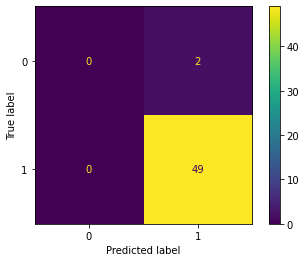

In [153]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

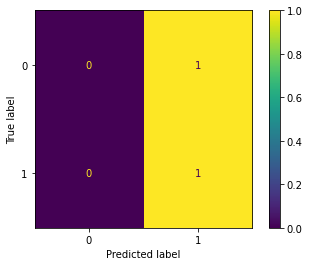

In [154]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')